# Data Mining: Fundamentals
## Michelangelo Leoni and Jacopo Omodei
-----

# Table of contents

[Intro](#intro)

[Data Understanding](#data_understanding)

[Data Preparation](#data_preparation)

[Data Clustering](#data_clustering)

[Data Similarity](#data_similarity)

------

# Introduction (Slides 0)

<a id="intro"></a>

What is __data mining?__ It is the use off efficient techniques for the _analysis_ of _very large collections of data_ and the _extraction_ of useful and hidden knowledge. 

__Primary data__ is original data that has been collected for a specific purpose (not altered by humans), while __secondary data__ is data that has already been collected and made available for other purposes (can come from many sources). 

## CRISP-DM:
__Cross-Industry Standard Process for Data Mining__. Reliable and repeatable data mining process in the field. 
- __Business understanding__
    - Understand what the __client wants__ to accomplish (business goals)
    - Assess the situation (resources, constraints, assumptions)
    - Determine data mining goals (how will we achieve the client's goal?)
    - Produce project plan
- __Data understanding__
    - Explore the data
        - Key attributes and their relations
        - Properties of sub-populations
        - If needed transform and prepare the data
    - Verify the quality of data (is it complete?)
    - Find outliers
    - Collect initial data (data loading, data integration from multiple sources)
    - Describe data (surface properties)
- __Data preparation__
    - Select data (which is useful?)
    - Clean data
    - Construct data (derived attributes or trasformed values)
    - Integrate data
    - Format data (without changing its meaning)
- __Modeling__
    - Select the technique (based on the data mining objective)
    - Test the model (seperate the data into training and validation to see how well the model fits the data)
    - Build the model and then assess it based on your criteria
- __Evaluation__
    - Evaluate how well the model performed on the test data (to what degree it meets the business objectives)
    -  Review the results, modifying if necessary
- __Deployment__
    - Plan deployment
        - How do we want to present our results?
        - What are our results (is it a report? A model? An algorithm?)
    - Plan monitoring and maintenance
    - Produce final report
    - Review project


------

<a id="data_understanding"></a>
# Data Understanding (slides 1)

It's fundamental to have an overall understanding of your data. We need to gain insight on your data with respect to our project goals and to understand the data's fundamental properties. For example, what kind of attributes do we have, and how are they correlated? How is the quality of the data? How are missing values handled? Do we need to extract other attributes? etc.

## Data
What is data? A collection of data objects and their attributes. An __attribute__ (_variable, field, characteristic, dimention, feature_) is a property or charactetristic of an object (while an __object__ (_record, point, case, sample, entity, instance_)is defined as a collection of attributes)

### Types of data: 
- __Record:__
    - Data matrix (table)
        - Objects have the same fixed set of attributes
        - Objects are points in a fixed dimention multi-dim space
    - Document data  <img align="right" width="250" src="figures/document_data.png">
        - Each term (word or phrase) is an attribute of the vector
        - The value of each attribute is the number of times the corresponding term occurs in the document
    - Transaction data (each record is a transaction that involves a set of items)
- __Graph:__ (directionally connected nodes)
  - Examples: World Wide Web, molecular structures, social networks
- __Ordered:__
    - Spatial-temporal data
    - Sequential data
    - Genetic sequence data  

### Types of attributes:
- __Nominal/categorical:__ attribute values in a finite domain, categories
    - Ex: ID numbers, eye color, zip codes
- __Binary:__ _nominal attribute_ with only two states (0 and 1)
    - Symmetric binary: 0/1 equally important (ex: gender)
    - Asymmetric binary: 1 is the presence of something (important) while 0 is the absence
- __Ordinal:__ finite domain with meaningful ordering on the domain
    - Ex: Rankings, grades, height
- __Numeric:__ quantity (integer or real-valued)
    - Interval-scaled: measured on a scale of equal-sized units, and the values have order. Example: calendar dates, temperature in C
- __Ratio-scaled:__ values being an order of magnitude larger than the unit of measurement
    - Ex: length, counts, elapsed time. (A game lasting 3 hours is _50% longer_ than a game lasting 2 hours)  

### Data quality:
Naturally, bad data can lead to incorrect conclusions and is to be avoided if possible. Some possible data quality issues can be:
- __Syntatctic accuracy:__ entry not in the domain
    - Ex: text in numerical attributes, typos
- __Semantic accuracy:__ data is in the domain but not correct
    - Ex: John Smith classified as female (though is male). Needs more information to be checked (you may not catch that J.S is a male, though you could catch a negative value in a defined-positive attribute)
- __Completeness__
- __Unbalanced data:__ data is biased to one type of record
- __Timeliness:__ is the data up to date?
- __Duplicate data:__ duplicates or almost duplicates (like merging from heterogeneous sources)
    - Ex: one person with multiple email addresses

### Data visualization:
Different types of statistical tools and charts may be used to best convey the patterns in the data. For example, scatterplots, bar charts, or __histograms__. The number of bins in a histogram is a fundamental parameter that drastically can change the usefulness of the presented data. The number of bins according to __Sturges' rule__ is \$k=\left[\log_2{(n)}+1\right]\$ where _n_ is the sample size. This rule is useful for normal distributions and moderately-sized datasets.

You can then use this number of bins to set _k_ equally-sized bins in the interval, or to create _k_ equally populated (but differently-sized) bins in the interval. There are also different binning practices, but these are the most common (and the first one is the most widely-used).

Data can be distributed in all sorts of ways, for example data can be __symmetric__, __bimodal__ (presenting two clear peaks), __positively skewed__ (with a long positive tail mean>mode), or __negatively skewed__ (long negative tail mean<mode)

<img align="right" width="110" src="figures/box_whisker.png">

__Box plot:__ five-number summary of a distribution. 
The data is represented with a box whose edges are the first and third quartiles (25% and 75%, respectively). The middle of the box (marked with a line) is the second quartile (50%, median). The whiskers (two lines out from the box) extend to the 1st, 5th or 10th percentile (depends on the convention) and 99th, 95th, 90th percentile respectively. Any points beyond the whiskers are outliers. 
In general, the p%-quartile is the value of _x_ so that p% of the values are smaller 

What box plots lack is the distribution of the data (two datasets can have the same quartiles but different distributions). Histograms instead are perfect for showing these further patterns.

__Scatter plots:__ can be useful to see clusters of points, outliers and correlations. They are limited by the fact that in higher dimensions they quickly become illeggible and sparse. However, to plot bivariate data (one attribute vs another) they can be quite useful. As shown in the figure, you can use scatterplot matrices to plot every attribute vs every other attribute in a dataset. 

<img align="center" width="200" src="figures/scatter_matrix.png">


__Radar plot:__ Coordinates are drawn in a star-like fashion, with each tip of the star being an attribute. Each pattern is a polygon within this space extending outwards for higher values of the attribute.

<img align="center" width="200" src="figures/radarplot.png">

### Correlation:
The sample __Pearson's correlation coefficient__ is a measure for a linear relationship between two numerical attributes X and Y and is defined as \$r_{xy} = \frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{(n-1)s_xs_y};\$ \$r_{xy}\in[-1,1]\$
where \$\bar{x},\bar{y}\$ are the mean values of X and Y, and \$s_x,s_y\$ are the corresponding sample standard deviations.

The larger the absolute value of the Pearson correlation coefficient, the stronger the linear relationship between the two attributes. For maximum correlation \$|r_{xy}|=1\$ and the values of X and Y line on a line. Positive (negative) correlation indicates a line with positive (negative) slope. 


### Outliers:
Outliers can be very annoying or very interesting. They can be because of noise, and effectively harmful for the data (potentially look to exclude them) or they can be the very case of our study (the verification of a rare but desired event). Outliers can be detected by looking at their frequency (low histogram count), numerical attribute (outside the whiskers in the box plot), they can be outliers with respect to one or more attributes (seen in scatter plots), and can also be found through cluster analysis. 

Oftentimes it is still useful to exlude correct (not born from noise but from rare events) outliers in our analysis, noting the fact that we have done so.



-------

<a id="data_preparation"></a>
# Data Preparation (slides 2)


Aggregation, data reduction: sampling, dimensionality reduction, feature subset selection. feature creation, discretization and binarization, attribute transformation

## Aggregation
__Aggregation:__ Combining two or more attributes into a single one. Its purpose is to reducte the number of attributes, to change the scale (ex. information about cities -> counties), and to have in general more stable (less variable) data. 

For example, instead of looking at daily trends you can look at weekly, monthly, or yearly trends and they should be, in principle, less variable than the original data. 

## Data reduction
In some way we want to reduce the amount of data. To reduce the number of _records_ (rows) we can use data sampling and clustering. To reduce the number of _attributes_ (columns) we can select a subset of attributes, or generate a new (smaller) set of attributes (for example through aggregation).

__Sampling__ is the main technique employed for data reduction, allowing us to not necessarily process the entire dataset. The idea is that if I choose a _representative sample_ using that sample will work almost as well as using the entire dataset. A sample is representative if it has approximately the same properties (at least the ones of interest) as the original dataset.

We will look at two different types of sampling: simple random sampling and stratified sampling. 

__Simple random sampling:__ There is an equal probability of selecting any particular item. You can either sample with or without replacement (the item either is or isn't removed from the population when selected). In sampling with replacement, the same object can be chosen more than once.

__Stratified sampling:__ The data is split into several partitions, and then a random sample is selected from each partition. It's a good approximation for the percentage of each class, helpful for distribution with peaks (each peak is a layer).

## Dimensionality reduction
A subset of attributes (that is as small as possible to be sufficient for analysis) is selected as to remove irrelevant or redundant features and reduce the dimensionality of the problem. For example, to measure students' performance the student ID is irrelevant, or the IVA paid on a product is irrelevant, if you know the original price and the fact that it is 22%.

__Curse of dimensionality:__ When the dimensionality of the data increases the data becomes increasingly sparse in the space that it occupies. The complexity increases and uncorreleted terms dominate over significant patterns. 

__Principal Component Analysis (PCA):__ An algorithm that finds a new set of dimensions (attributes or features) that better captures the variability of the data. The first dimension is chosen to capture as much of the variability as possible, and the second dimension is orthogonal to the first (captures the rest of the remaining variability). It can be seen as a linear transformation that cooses a new coordinate system for the dataset. 

The algorithm is as follows: <img align="right" width="200" src="figures/pca.png">

1. Standardize the dataset
2. Calculate the covariance matrix for the features in the dataset
3. Calculate the eigenvalues and eigenvectors for the covariance matrix
4. Sort eigenvalues and their corresponding eigenvectors and pick k eigenvalues and form a matrix of eigenvectors
5. Transform the original matrix

By doing this you have found the new axes so that the projection of the original points onto this axis is maximized. Now you can use the original 2-dimensional data as 1-d data having minimized the loss of information.

## Feature subset selection
For __removing irrelevant features__, a _performance measure_ is needed that indicates how well a feature or subset of features performs with respect to the considered data analysis task. For __removing redundant features__ either a _performance measure_ for subsets of features or a _correlation measure_ is needed.

To reduce dimensionality, you can __filter__ the features after having analyzed the significance and correlation with other attirbutes (pre-processing operation). You can also use __embedded methods__, which are part of the data mining algorithm (for example, implementing a decision tree that selects features during the data mining process). 

There are also __wrapper methods__ for feature selection, which select the top-ranked features using a DM task as reference (best with respect to a specific measure of statistical significance). You can either choose the top ranked feature using this metric, select the top ranked subset (searching through all subsets, which is extremely large even for a small number of features), start with an empty set and add the best feature one by one, or start with a full set and remove the worst feature one by one. 

## Feature creation
You can also create new attributes that can more efficiently capture the important information about the dataset than the original ones. For example, you have a dataset containing the mass of various objects and their volumes, we can create a new feature called "density" which reduces our dataset by one dimension. To create a useful feature the data miner must make intelligent decisions and know what problem they are trying to solve. 

__Feature projection (extraction):__ It trasforms the data in the high dimension space to a fewer dimension space. The possible approaches are as follows:
- Principal Component Analysis (PCA)
- Singular Value Decomposition (SVD)
- Non-negative matrix factorization (NMF)
- Linear Discriminant Analysis (LDA)
- Autoencoder

These can be looked up and studied as the need arises.

## Data cleaning
How do we handle anomalous values? 

For example, missing values (NULL, ?) can be either eliminated or substituted. It's common practice to estimate missing values using the probability distribution of existing values. In some way we must extrapolate from our existinga data. 

For example, we can segment the data and use the mean, median, mode for each segment, we can use the pdf within each sechemt, or simply use classification/regression techniques to compute missing values. 

## Discretization and binarization
__Discretization__ is the process of converting a continuous attribute into an ordinal attribute (mapping a continuous value onto a set number of categories - makes it useful for classification problems). Making a histogram is nothing more than discretizing my data. 

Unsupervised discretization: no labels for the instances and unknown number of classes. Otherwise, you must coose the number of classes. Two empirical rules are: number of classes C: \$C=1+\frac{10}{3}\log_{10}(N)\$ (Sturges) and width of the classes: \$h= \frac{3.5\cdot s}{\sqrt{N}}\$, where _s_ is the variance of the data. 

__Binarization__ instead maps a continuous or categorical attribute into one or more binary variables. It's typically used for association analysis. 

## Attribute transformation
If our data has errors (mistakes, not statistical), is incomplete, not adequately distributed, or presents strong asymmetries, it can be a good idea to apply some transformations. 

An __attribute transformation__ is a function that maps the entire set of values of a given attribute to a new set of replacement values such that each old value can be identified with one of the new values. For example, you can take the absolute value or the logarithm. A popular transformation is __normalization__, which refers to the various ways one can adjust the differences among attributes (for example, diminishing their variance). In general, __standardization__ refers to subtracting off the means and dividing by the standard deviation. 

A good transformation _T_ on the attribute _X_ \$Y=T(X)\$ is such that _Y_ preserves the relevant information of _X_, while removing at least one problem of _X_ (therefore _Y_ is more "useful" than _X_)

The main goals in a transformation is to stabalize the variance of the data, normalize the distributions, and to make linear relationships between the variables. Secondarily, we like to simplify the elaboration of data containing features that we do not like, and to represent the data in a more suitible scale. We like having linear correlations, normal distributions, and small scales because they are the base hypotheses for many statistical tools and methods.

__min-max normalization:__ \$v^\prime = \frac{v-\min(v)}{\max(v)-\min(v)}\$ normalizes to [0,1].

__z-score normalization:__ \$v^\prime = \frac{v-\mu}{\sigma}\$ normalizes to a normal distribution with mean 0 and standard deviation 1.

__Exponential transformation:__ \$T_p(x) = ax^p+b\$ or \$T_0(x)=c\log{x}+d\$ with all real-valued parameters. These transformations preserve the order and most basic statistics, are differentiable and described by simple functions. The logarithmic transformation is especially helpful for closing the gaps between sparse data (several orders of magnitude).

The exponential transformation with a fractional _p_ is a __square root transformation__, which when \$p=\frac{1}{2}\$ can make homogenous the variance of particular distributions (like the Poisson). With \$p<0\$ you have the __reciprocal transformation__ which is useful for analyzing time series, when the variance increases too much with respect to the mean.

-------

<a id="data_similarity"></a>

# Data Similarity (slides 3)
__Similarity:__ The numerical measure of how alike two data objects are (higher when they are more alike, and generally in the [0,1] range). _Dissimilarity_ can be seen as the opposite (lower when objects are more alike), and _proximity_ refers to a similarity or dissimilarity. 

Similarity is measured in a different way based on the type of attribute. Given \$p,q\$ the attribute values for two data objects:
- Nominal attributes have \$s= 1\$ if \$p=1\$ and \$s= 0\$ if \$p\neq1\$
- Ordinal attributes have \$s=1-\frac{|p-q|}{n-1}\$ where \$p,q\$ are integer values \$p,q\in[0,n-1]\$ where \$n\$ is the number of values.
- Interval or ratio attributes have _dissimilarity_ \$d=|p-q|\$ and _similarity_ can be expressed in many ways:
    - \$s=-d\$
    - \$s=\frac{1}{1+d}\$
    - \$s=1-\frac{d-\min{d}}{\max{d}-\min{d}}\$

### Distance as a measure of dissimilarity

The __Euclidean distance__ is also a good measure of dissimilarity \$d(x,y) = \sqrt{\sum_{k=1}^n\left(x_k-y_k\right)^2}\$ where _n_ is the number of dimensions and \$x_k,y_k\$ are respectively the \$k^{th}\$ attributes of data objects _x_ and _y_. If scales differ between data objects standardization in necessary. 

The __Minkowski distance__ is a generalization of the Euclidean one: \$d(x,y)= \left(\sum_{k=1}^n|x_k-y_k|^r\right)^{\frac{1}{r}}\$ where _r_ is a parameter that determines the type of distance. For example, \$r=1\$ gives the "city block" distance (the distance between two points is the sum of the x distance + y distance),  \$r=2\$ gives the Euclidean distance, and  \$r\rightarrow\infty\$ gives the max norm distance (maximum difference between any component of the vector).

Distances have some defining properties:
- The distance between two points is defined positively and is equal to 0 if and only if the two points coincide
- The distance between A and B is the same as the distance between B and A
- Triangle inequality: \$d(x,z)\leq d(x,y)+d(y,z)\$ for all _x,y,z_

It is said that a distance that satisfies all of these properties is a __metric__.

Similarities also have similar properties: 
- \$s(x,y)=1\$ if and only if \$x=y\$
- \$s(x,y) = s(y,x)\$ for all _x,y_

### Similarity between binary vectors
If objects _p,q_ only have binary attributes we compute similarities using the following quantities:
- \$M_{01}\$ is the number of attributes where _p_ was 0 and _q_ was 1
- \$M_{10}\$ is the number of attributes where _p_ was 1 and _q_ was 0
- \$M_{00}\$ is the number of attributes where _p_ was 0 and _q_ was 0
- \$M_{11}\$ is the number of attributes where _p_ was 1 and _q_ was 1

__Simple Matching Coefficients (SMC):__ The number of matches over the number of attributes: \$\text{SMC} = \frac{M_{11}+M_{00}}{M_{01}+M_{10}+M_{00}+M_{11}}\$

__Jaccard Coefficients:__ Number of 1-1 matches over number over non-0-0 attribute values. This is because both objects _not_ having an attribute might not be a cause for similarity, and we want to focus on what attributes they actually match. \$\text{J} = \frac{M_{11}}{M_{01}+M_{10}+M_{11}}\$

### Similarity in document data
<img align="right" width="200" src="figures/document_data.png">

__Cosine similarity:__ If \$d_1\$ and \$d_2\$ are both document vectors, then \$\cos{(d_1,d_2)} = \frac{d_1\bullet d_2}{||d_1||\cdot||d_2||}\$


### Implementing weights
You may not want to treat all of the attributes the same, so you can multiply by non negative weights \$w_k\$. For example, \$\text{similarity}(x,y)= \frac{\sum_{k=1}^nw_k\delta_ks_k(s,y)}{\sum_{k=1}^nw_k\delta_k}\$, or you can define a weighted distance \$d(x,y)= \left(\sum_{k=1}^nw_k|x_k-y_k|^r\right)^{\frac{1}{r}}\$


### Mixed/heterogenous disances
If we have data with both continuous and categorical attributes we can discretize the contiuous ones and use categorical distances like Jaccard or SMC. We can also define a new heterogenous distance like \$d(x,y)= \frac{n_{cat}\cdot d_{cat}(x_{cat},y_{cat})}{n} + \frac{n_{con}\cdot d_{con}(x_{con},y_{con})}{n}\$

-------

<a id="data_clustering"></a>
# Data clustering (lesson 4)

The idea is to find groups of objects such that the objects in a group will be similar to one another and different from the objects in the other groups. As usual, the idea is to reduce the size of larger data sets.

__Partitional clustering:__ a division of data objects into non-overlapping clusters such that each data object is in exactly one cluster

__Hierarchical clustering:__ a set of organized clusters as an hierarchical tree

__Exclusive vs non-exclusive:__ in non-exclusive clusterings, points may belong to multiple clusters. Can represent multiple classes or "border" points.

__Fuzzy vs non-fuzzy:__ in fuzzy clustering, a point belongs to every cluster with some weight between 0 and 1, with the sum of the weights equal to 1. Similar to _probabilistic_ clustering.

__Heterogeneous vs homogeneous clustering:__ cluster of different sizes, shapes and densities.

Types of clusters:
- __Well-separated:__ Cluster such that any point in a cluster is closer to every other point in the cluster than any point not in the cluster
- __Center-based:__ Such that an object in a cluster is closer to the center of a cluster than to the center of any other cluster. Often instead of the center we use the centroind (average of all the points)
- __Contiguity-based:__ Each point is closer to at least one point in its cluster than to any point in another cluster. This approach can have trouble when noise is present, as a small bridge of points can merge two distinct clusters
- __Density-based:__ A dense reigon of points seperated by a low-density reigion from other clusters
- __Objective function:__ Clusters are such that they minimize a specific function, enumerating all possible ways to clusterize the points, associating a score, and taking the best one.  Hierarchical clustering algorithms usually have local objective functions while partitional algorithms have global ones

### Cluster validity
__External index:__ Used to measure the extent to which cluster labels match externally supplied class labels (entropy).

__Internal index:__ Used to measure the goodness of a clustering structure without respect to external information (sum  of squared error SSE)

__Relative index:__ Used to compare two different clusterings or clusters

__Cluster validity via correlation:__ Build two matrices, one which each element $A_{i,j}$ has the distance between $x_i$ and $x_j$, and the other matrix _B_, where $B_{i,j}$ is $1$ if points $x_i$ and $x_j$ belong to the same cluster, $0$ if not. You then compute the _correlation_ between the two matrices, and if it is high then it suggests that the points that belong to the same cluster are close to each other, which could be a good indicator for cluster validity.

__SSE:__ Can be used to express cluster validity or to estimate the number of clusters. Mathematically, within a cluster sum the squares of the distances of each point to the centroid. To see how well seperated a cluster is from the others, sum the squares of the differences from one centroid to all the others (weighted with the cluster size). 

__Silhouette Coefficient:__ Combines both cohesion and seperation. For an individual point $i$, $a$ is the average distance of $i$ to the points in its cluster, and $b$ is the minimum of the average distance of $i$ to the points in another cluster, $s=\frac{b-a}{\max(a,b)}$ gives the _silhouette coefficient_ which is better when closer to 1. You can calculate the average silhouette coefficient for a cluster or a clustering.

In general, we can use an algorithm to obtain a "score" for clusters. How do we know if that is good or not? We should use statistics. For example, if I clusterize 500 points into 3 clusters (and obtain an SSE of 0.005), I can generate 500 random points and use the same clustering and evaluation algorithm over many generations and obtain a histogram of how the SSE is distributed. I can then use a p-value test or similar statistical tools. 

-------

# K-mean clustering (lesson 5)

Each cluster is associated with a centroid, and each data point is assigned to the cluster with the closest centroid.
A typical K-Means clustering algorithm works as follows:

- Select K random points as the initial centroids.
- Repeat until the centroids no longer change:
    - Assign each data point to the cluster with the closest centroid.
    - Compute the mean of each cluster.
    - Update the centroids to the newly computed means.

Complexity is $O(n\cdot K \cdot I \cdot d)$ where _n_ is the number of points, _K_ the number of clusters, _I_ the number of iterations, and _d_ the number of attributes.

To evaluate the most common method is the SSE for each point: $SSE=\sum_{i=1}^K\sum_{x\in C_i}dist^2(m_i,x)$

Naturally, more clusters generally have less SSE, however a good clustering with a small K can have a lower SSE than a poor clustering with a higher K. 

K-means has problems when the clusters have different sizes, densities, or are in non-globular shapes. Therefore, it is important to normalize the data and eliminate outliers before processing the data, and to eliminate small clusters that represent outliers, split loose clusters and merge close clusters in post-processing. 

How do you choose the initial centroids? Randomly, with different runs for example. Otherwise, you could sample and use hierarchical clustering to determine the initial centroinds or use bisecing k-means.

### Bisecting k-means
Variant of K-means that can produce a hierarchical clustering. The number of clusters K must be specified. Start with a unique cluster containing all the points:
1. Select the cluster with the highest SSE to the list of clusters
2. For $i=1$ to _number of iterations_: bisect the selected cluster using basic 2-means
3. Add the two clusters from the bisection to the list of clusters
Repeat these steps until your list contains $K$ clusters.

### X-means clustering
__Bayesian information criterion (BIC):__ A strategy to stop the bisecting algorithm when a meaningful number of clusters are reached to avoid over-splitting. It can be adopted as a splitting criterion to decide if a cluster should be split or not. It measures the improvement of the cluster structure between a cluster and its two children clusters. If the BIC of the parent is less than the BIC of the children then we accept the bisection. 

__BIC formula:__ $BIC(M_j)=\hat{l_j}(D)-\frac{p_j}{3}\log R$ where $\hat{l_j}(D)$ is the log-likelihood of the dataset _D_, $p_j$ is a function of the number of independent parameters (centroids coordinates, variance estimation). _R_ is the number of points in a cluster, and _M_ is the number of dimensions. It approximates the probability that the clustering in $M_j$ is describing the real clusters in the data

__X-means algorithm:__ For _k_ in a given range $[r_1, r_{max}]$:
1. Improve parameters: run k-means with the current _k_
2. Improve structure: recursively split each cluster in two (bisecting 2-means) and use _local BIC_ to decide if to keep the split. Stop if the current structure does not respect _local BIC_ or if the number of clusters is higher than $r_{max}$
3. Store the actual configuration with a global _BIC_ calculated on the whole configuration
4. If $k>r_{max}$ stop and return the best model with respect to the _global BIC_

Within the x-means algorithm the _BIC_ formula changes, as the likelihood is seen as a spherical-Gaussian assumption. Focusing on the set $D_n$ of points which belong to centroid _n_: $\hat{l_j}(D_n) = -\frac{R_n}{2}\log(2\pi)-\frac{R_n\cdot M}{2}\log(\hat{\sigma^2})-\frac{R_n-K}{2} + R_n\log R_n - R_n\log R$. It estimates how closely to the centroid are the points in the cluster. 

### Expectation maximization
We will assume there is a model that describes the data, and we try to find the one that best fits. We will assume a certain distribution from which data points are sampled. We initialize the parameters of this distribution function to random values, and calculate the likelihood, changinf the parameters in a way to maximize the likelihood. 

What this translates to for k-means clustering is to randomly select the centroids, assign points to clusters based on distances with the centroids, and then calculate new centroids at the values which minimize the distance with other points in the cluster. 

### K-modes
For classification problems, instead of the Euclidean distance we use the number of mismatches between the attributes of two objects. The k-mode algorithm uses the mode as representative object of a cluster.

__L'ultima parte parla di maximum likelihood estimate che, dai, sappiamo (ASD jumpscare)__

Ah, se vuoi ridurre i dati prima cluster poi fai tipo PCA non viceversa!

-------

Output()

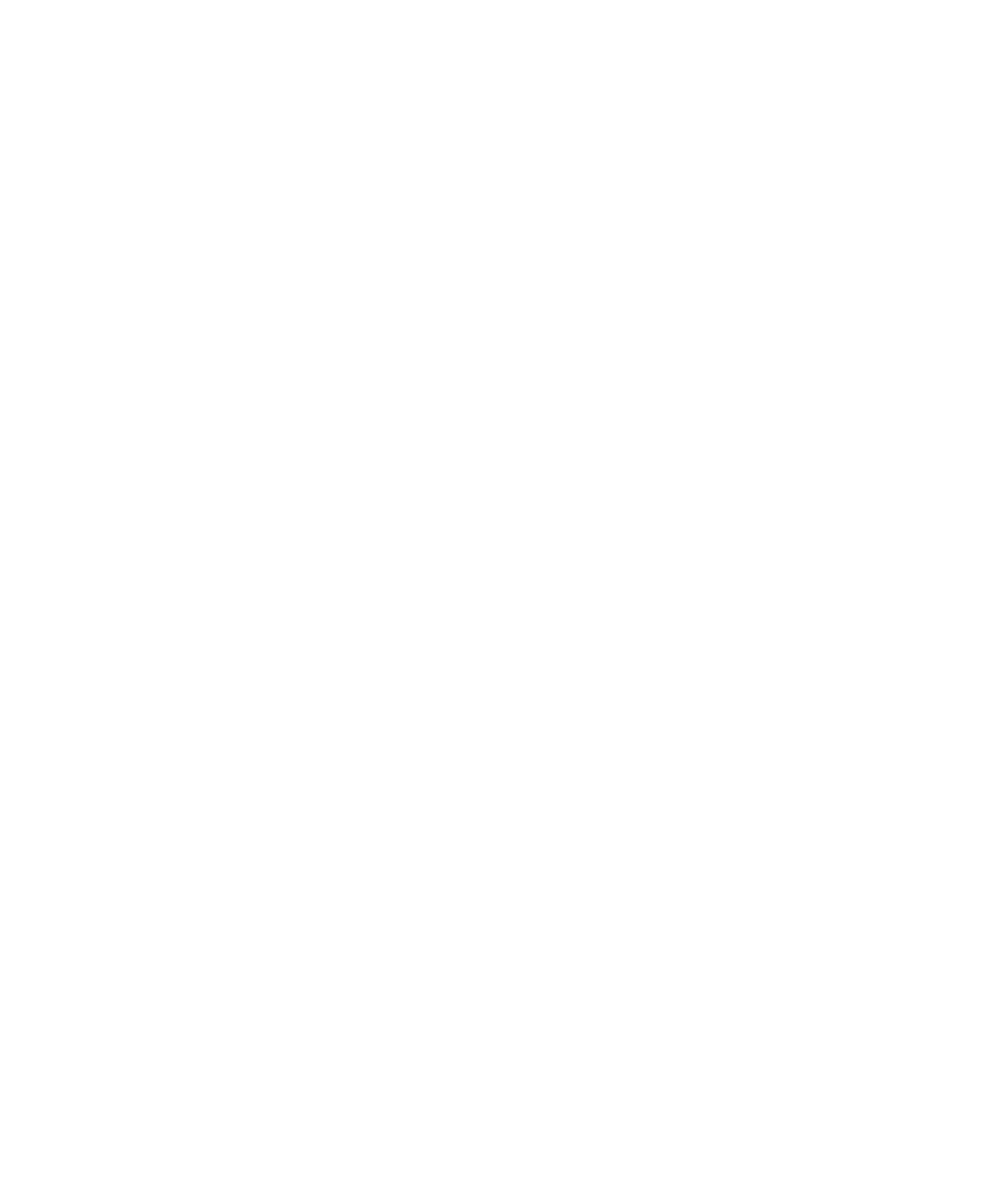

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ipywidgets import interact, IntSlider, FloatSlider, Checkbox, Button, VBox, HBox, Output
from IPython.display import display, clear_output

class Point:
    """A point in 2D space with methods to generate random coordinates and assign to clusters."""

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def random_normal(self, mean_x, mean_y, sigma_x, sigma_y):
        self.x = np.random.normal(mean_x, sigma_x)
        self.y = np.random.normal(mean_y, sigma_y)

class Cluster:
    """A cluster represented by its centroid."""

    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.points = []

    def add_point(self, point):
        self.points.append(point)

    def mean(self):
        if not self.points:
            return self.x, self.y
        mean_x = np.mean([p.x for p in self.points])
        mean_y = np.mean([p.y for p in self.points])
        return mean_x, mean_y
    
    def update_centroid(self):
        self.x, self.y = self.mean()

    def square_mean_error(self):
        return np.sum([(p.x - self.x)**2 + (p.y - self.y)**2 for p in self.points])

class Gaussian:
    def __init__(self, mean, sigma):
        self.mean = mean
        self.sigma = sigma

def generate_points_normal(mean_x, mean_y, sigma_x, sigma_y, points_per_cluster=100):
    points = []
    for _ in range(points_per_cluster):
        p = Point(0, 0)
        p.random_normal(mean_x, mean_y, sigma_x, sigma_y)
        points.append(p)
    return points

def generate_clustered_data(gaussians, points_per_cluster=100):
    all_points = []
    for gaussian in gaussians:
        cluster_points = generate_points_normal(
            mean_x=gaussian[0].mean,
            mean_y=gaussian[1].mean,
            sigma_x=gaussian[0].sigma,
            sigma_y=gaussian[1].sigma,
            points_per_cluster=points_per_cluster
        )
        all_points.extend(cluster_points)
    return all_points

def generate_gaussians(num_clusters=3, mean_range=(0, 10), sigma_range=(0.5, 1.5)):
    gaussians = []
    for _ in range(num_clusters):
        mean_x = np.random.uniform(*mean_range)
        mean_y = np.random.uniform(*mean_range)
        sigma_x = np.random.uniform(*sigma_range)
        sigma_y = np.random.uniform(*sigma_range)
        gaussians.append((Gaussian(mean_x, sigma_x), Gaussian(mean_y, sigma_y)))
    return gaussians

def k_means_alg(points, k, max_iters=5):
    n_points = len(points)
    if n_points == 0:
        return []
    # clamp k to number of available points to avoid np.random.choice errors
    k = min(k, n_points)
    indices = np.random.choice(n_points, k, replace=False)
    centroids = [Cluster(points[i].x, points[i].y) for i in indices]

    for _ in range(max_iters):
        for c in centroids:
            c.points = []

        for point in points:
            distances = np.sqrt((point.x - np.array([c.x for c in centroids]))**2 +
                                (point.y - np.array([c.y for c in centroids]))**2)
            nearest = np.argmin(distances)
            centroids[nearest].add_point(point)

        for c in centroids:
            c.update_centroid()

    return centroids

def incremental_k_means(points, min_k, max_k, max_iters=5):
    sse = []
    n_points = len(points)
    for k in range(min_k, max_k + 1):
        if k <= 0:
            sse.append(np.nan)
            continue
        if n_points == 0:
            sse.append(np.nan)
            continue
        if k > n_points:
            # cannot form more clusters than points; append NaN to indicate invalid
            sse.append(np.nan)
            continue
        centroids = k_means_alg(points, k=k, max_iters=max_iters)
        sse.append(np.sum([c.square_mean_error() for c in centroids]))
    return sse

def plot_clusters(points, centroids, gaussians, ax):
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    ax.clear()

    for idx, centroid in enumerate(centroids):
        cluster_points = centroid.points
        ax.scatter([p.x for p in cluster_points], [p.y for p in cluster_points],
                   color=colors[idx % len(colors)], label=f'Cluster {idx+1}', alpha=0.5)

    ax.scatter([c.x for c in centroids], [c.y for c in centroids],
               color='black', marker='X', s=200, label='Centroids')

    for idx, gaussian in enumerate(gaussians):
        ax.scatter(gaussian[0].mean, gaussian[1].mean, color='orange', marker='D', s=100)
        ellipse = patches.Ellipse(
            (gaussian[0].mean, gaussian[1].mean),
            2*gaussian[0].sigma,
            2*gaussian[1].sigma,
            color='orange', fill=False, linestyle='dashed'
        )
        ax.add_patch(ellipse)

    ax.set_title('K-Means Clustering')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.grid(True)
    ax.legend()


def plot_sse(sse, min_k, ax):
    ax.clear()
    ax.plot(range(min_k, min_k + len(sse)), sse, marker='o')
    ax.set_title('SSE vs Number of Clusters (k)')
    ax.set_xlabel('Number of Clusters (k)')
    ax.set_ylabel('Sum of Squared Errors (SSE)')
    ax.grid(True)

# ✅ Interactive K-Means runner with Regenerate button
def run_interactive_kmeans():
    # --- Widgets ---
    num_clusters = IntSlider(min=1, max=10, step=1, value=5, description='Clusters')
    points_per_cluster = IntSlider(min=10, max=500, step=10, value=100, description='Points/Cluster')
    mean_min = FloatSlider(min=-10, max=10, step=0.5, value=0, description='Mean min')
    mean_max = FloatSlider(min=0, max=50, step=0.5, value=10, description='Mean max')
    sigma_min = FloatSlider(min=0.1, max=5, step=0.1, value=1.0, description='Sigma min')
    sigma_max = FloatSlider(min=1, max=10, step=0.1, value=2.0, description='Sigma max')
    k = IntSlider(min=1, max=10, step=1, value=5, description='K')
    max_iters = IntSlider(min=1, max=50, step=1, value=10, description='Iterations')
    min_k = IntSlider(min=1, max=10, step=1, value=1, description='Min K')
    max_k = IntSlider(min=1, max=20, step=1, value=15, description='Max K')
    show_sse = Checkbox(value=True, description='Show SSE Plot')
    regenerate = Button(description='🔁 Regenerate Data', button_style='info')

    out = Output()

    # --- Main logic ---
    def update_plot(*args):
        with out:
            clear_output(wait=True)
            plt.close('all')  # close all old figures

            mean_range = (min(mean_min.value, mean_max.value), max(mean_min.value, mean_max.value))
            sigma_range = (min(sigma_min.value, sigma_max.value), max(sigma_min.value, sigma_max.value))

            gaussians = generate_gaussians(num_clusters.value, mean_range, sigma_range)
            points = generate_clustered_data(gaussians=gaussians, points_per_cluster=points_per_cluster.value)
            centroids = k_means_alg(points, k=k.value, max_iters=max_iters.value)

            # Create one figure with two axes (clusters + optional SSE)
            if show_sse.value:
                fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
            else:
                fig, ax1 = plt.subplots(figsize=(10, 8))
                ax2 = None

            plot_clusters(points, centroids, gaussians, ax1)

            if show_sse.value and ax2 is not None:
                sse = incremental_k_means(points, min_k=min_k.value, max_k=max_k.value, max_iters=max_iters.value)
                plot_sse(sse, min_k=min_k.value, ax=ax2)

            plt.tight_layout()
            plt.show()

    # --- Event bindings ---
    regenerate.on_click(update_plot)
    for w in [num_clusters, points_per_cluster, mean_min, mean_max, sigma_min, sigma_max, k, max_iters, min_k, max_k, show_sse]:
        w.observe(update_plot, names='value')

    # --- Layout ---
    controls = VBox([
        HBox([num_clusters, points_per_cluster]),
        HBox([mean_min, mean_max]),
        HBox([sigma_min, sigma_max]),
        HBox([k, max_iters]),
        HBox([min_k, max_k]),
        HBox([show_sse, regenerate])
    ])

    display(controls, out)
    update_plot()

# ✅ Run only when inside an IPython kernel (e.g. Jupyter)
try:
    import IPython
    if IPython.get_ipython() is not None:
        run_interactive_kmeans()
except Exception:
    # not running in IPython environment — skip auto-run
    pass